https://rstudio-pubs-static.s3.amazonaws.com/391087_7ca7f30e3a3c4b35b9887be5fa8a7789.html

# 3.32 

Giá dầu thô tính bằng đô la/thùng là giá dầu. Điều chỉnh mô hình ARIMA(p, d, q) phù hợp với tốc độ tăng trưởng thực hiện tất cả các chẩn đoán cần thiết. Bình luận.

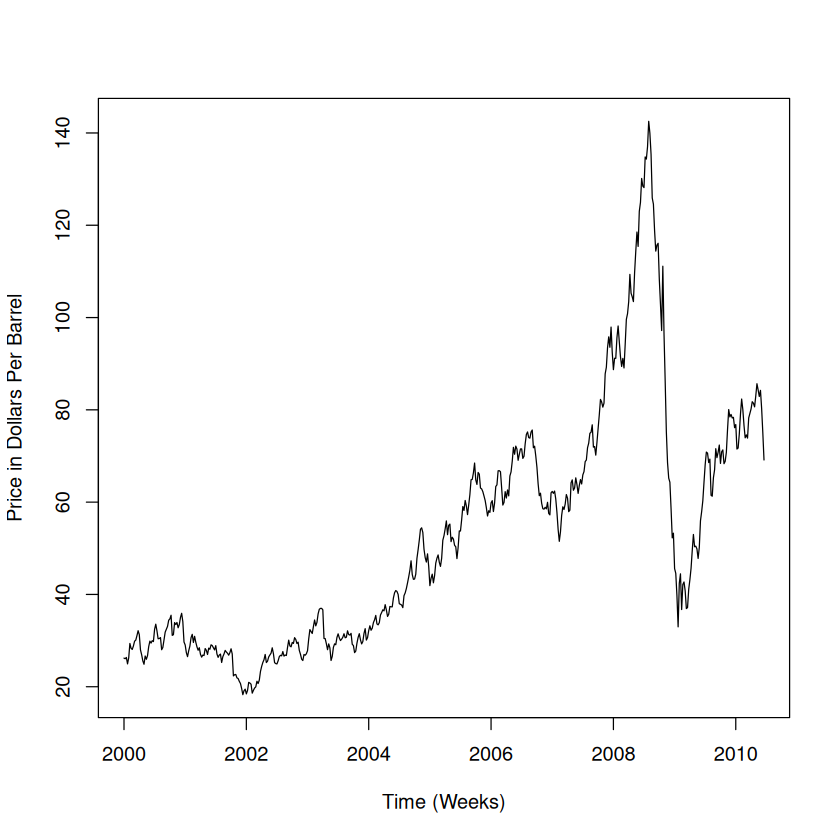

In [1]:
library(astsa)
plot.ts(oil, xlab = "Time (Weeks)", ylab = "Price in Dollars Per Barrel")

Vì biểu đồ trên có xu hướng tăng lên rõ ràng nên dữ liệu có thể cần có sự khác biệt.

Vẽ biểu đồ ACF và PACF của dữ liệu mang lại:

ACF,0.99,0.99,0.98,0.97,0.95,0.94,0.93,0.92,0.90,0.89,⋯,0.53,0.53,0.52,0.52,0.51,0.51,0.51,0.50,0.50,0.50
PACF,0.99,-0.17,-0.04,-0.10,0.00,-0.04,-0.03,-0.01,-0.14,-0.03,⋯,-0.04,-0.01,0.02,0.04,0.05,-0.01,-0.03,-0.06,-0.02,-0.01


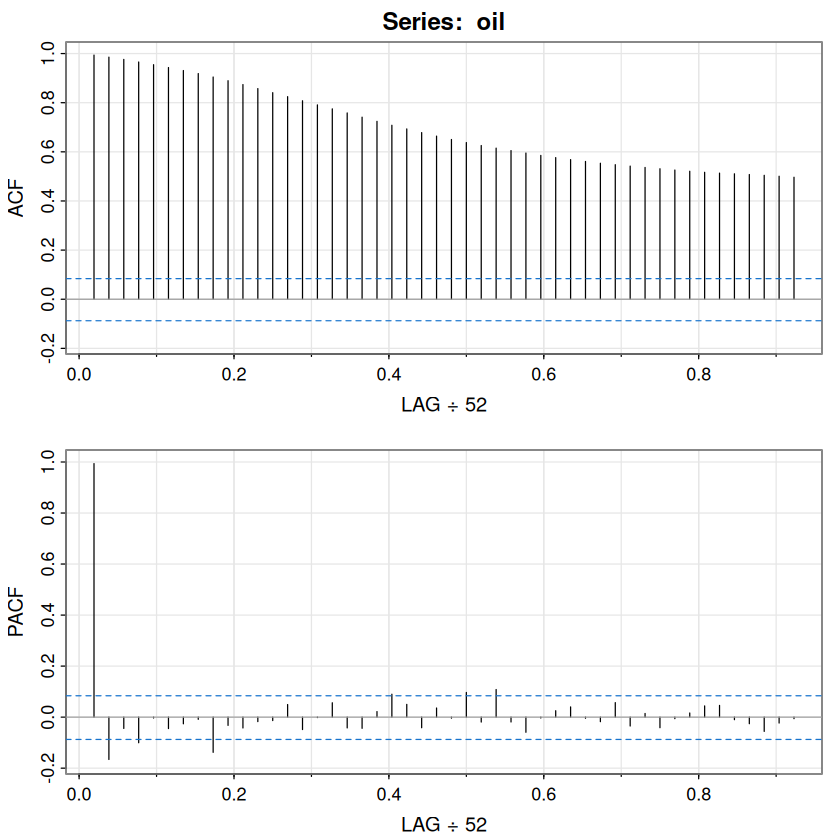

In [2]:
acf2(oil, 48)

ACF đang giảm dần theo thời gian với PACF chỉ có ý nghĩa ở độ trễ 1. AR = 1.

Do đó tạo một dữ liệu khác biệt để làm cho dữ liệu đứng yên ở mức trung bình và loại bỏ xu hướng.

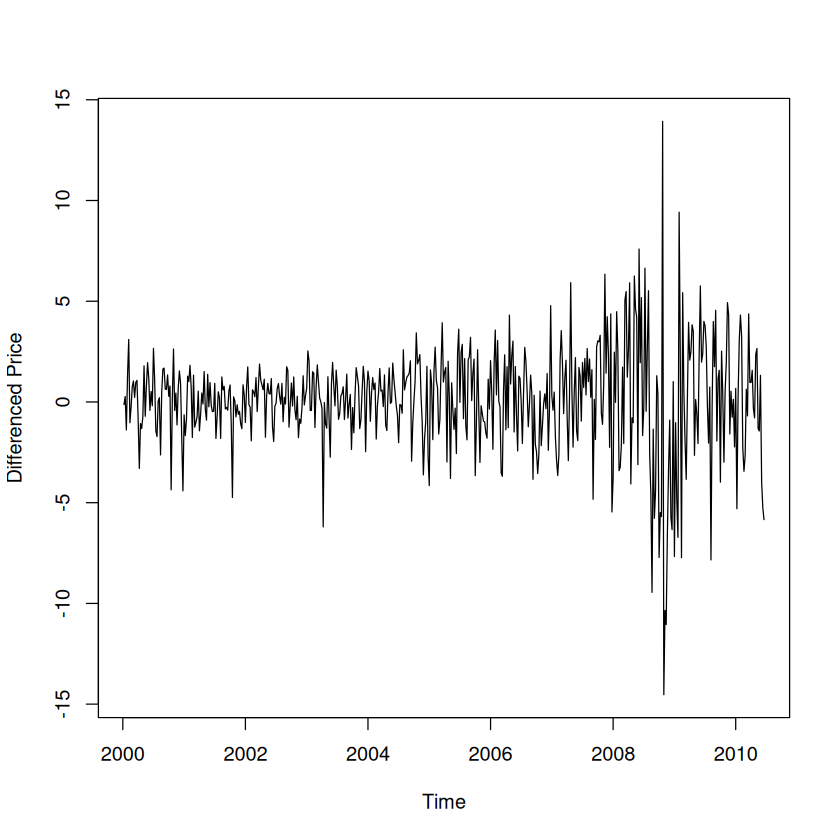

In [3]:
plot(diff(oil), ylab = 'Differenced Price')

Do thi trong rat on. Tuy nhien phuong sai du lieu tang thi thoi gian tang nen yeu cau can thay doi goc nhin.

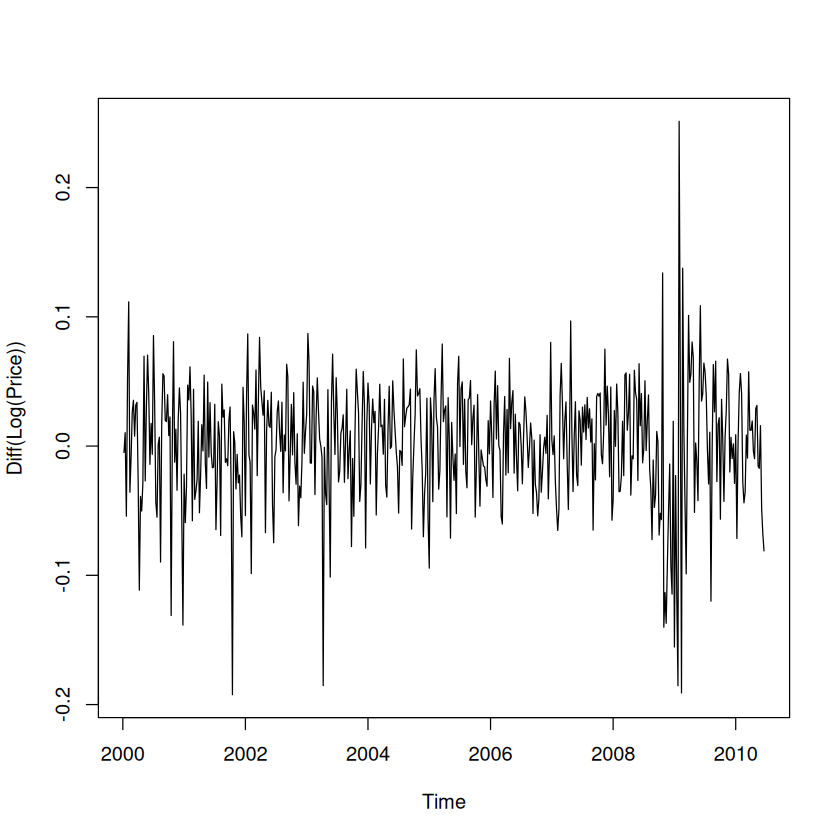

In [4]:
plot(diff(log(oil)), ylab = 'Diff(Log(Price))')

Viec lay logistic da cai thien phan nao tinh dung cua du lieu.
Bay gio phan tich ACF va PACF cua chung.

ACF,0.13,-0.07,0.13,-0.01,0.02,-0.03,-0.03,0.13,0.08,0.02,⋯,0.02,0,0.00,0.00,-0.04,0.00,0.04,0.04,0.04,0.01
PACF,0.13,-0.09,0.16,-0.06,0.05,-0.08,0.00,0.12,0.05,0.03,⋯,0.00,0,-0.02,-0.01,-0.05,-0.01,0.02,0.04,0.05,-0.01


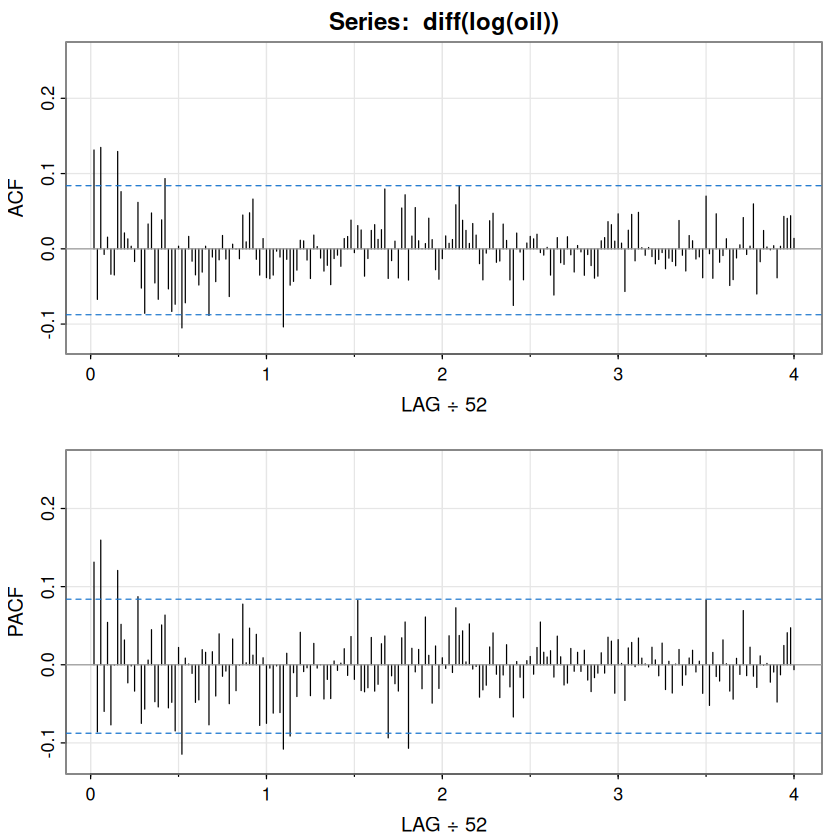

In [5]:
acf2(diff(log(oil)))

Từ biểu đồ ACF ở trên, có vẻ như ngoài AR = 1, I = 1, MA = 1 cũng vậy vì độ trễ 1 chỉ có ý nghĩa đáng kể. Độ trễ còn lại nhìn chung là không đáng kể.

Như vậy mô hình ARIMA được đề xuất là ARIMA(1,1,1)

In [6]:
fit <- arima(log(oil), order = c(1,1,1))     
fit


Call:
arima(x = log(oil), order = c(1, 1, 1))

Coefficients:
          ar1     ma1
      -0.5253  0.7142
s.e.   0.0872  0.0683

sigma^2 estimated as 0.002104:  log likelihood = 904.58,  aic = -1803.15

initial  value -3.057594 
iter   2 value -3.061420
iter   3 value -3.067360
iter   4 value -3.067479
iter   5 value -3.071834
iter   6 value -3.074359
iter   7 value -3.074843
iter   8 value -3.076656
iter   9 value -3.080467
iter  10 value -3.081546
iter  11 value -3.081603
iter  12 value -3.081615
iter  13 value -3.081642
iter  14 value -3.081643
iter  14 value -3.081643
iter  14 value -3.081643
final  value -3.081643 
converged
initial  value -3.082345 
iter   2 value -3.082345
iter   3 value -3.082346
iter   4 value -3.082346
iter   5 value -3.082346
iter   5 value -3.082346
iter   5 value -3.082346
final  value -3.082346 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE t.value p.value
ar1       -0.5264 0.0871 -6.0422  0.0000
ma1        0.7146 0.0683 10.4699  0.0000
constant   0.0018 0.0022  0.7981  0.4252

sigma^2 estimated as 0.002101997 on 541 degrees of freedom 
 
AIC = -3.312109  AICc = -3.312027  BIC = -3.280499 
 


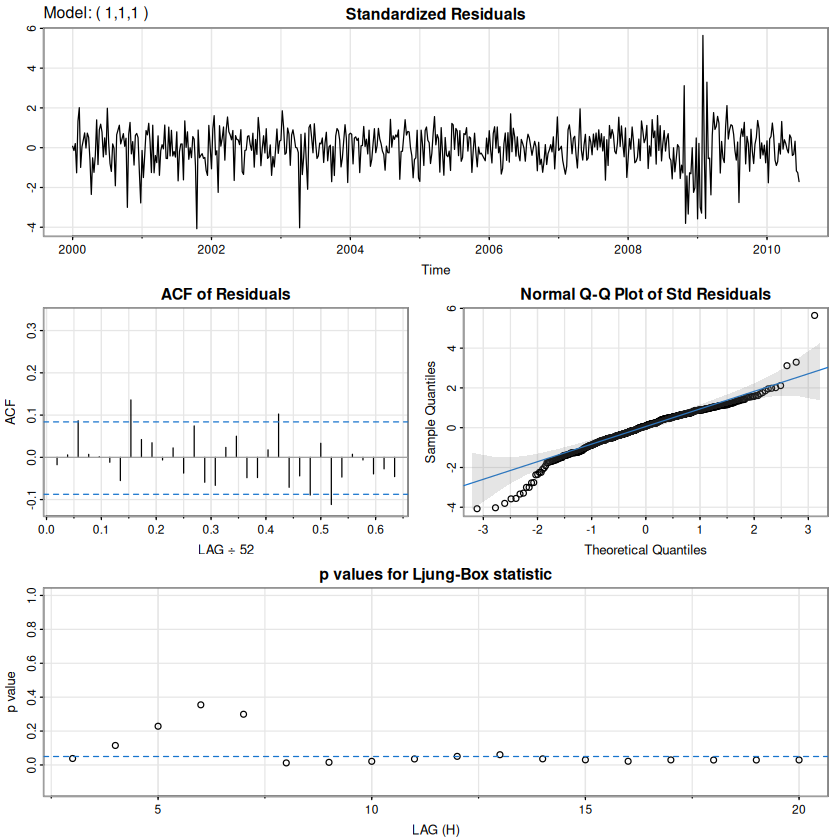

In [7]:
arima.fit = arima.sim(list(order=c(1,1,1), ar = -0.5253, ma = 0.7142), n = 100)
sarima(log(oil), 1,1,1)

Phân tích đồ thị cho mô hình ARIMA(1,1,1): Phần dư được chuẩn hóa - Không phát hiện xu hướng nào. Data chung trông giống như white noise với một vài ngoại lệ vào khoảng năm 2009. ACF của phần dư - Tất cả độ trễ đều có ý nghĩa quan trọng. Không khác với các giả định của mô hình Q-Q bình thường. 

Đồ thị phần dư được chuẩn hóa - Do có các giá trị ngoại lệ, nên có một số giá trị ngoại lệ được phát hiện ở phần đuôi cho thấy sự khác biệt so với giá trị chuẩn. Giá trị P cho Thống kê Ljung-Box - Hầu hết các giá trị p đều nằm dưới đường chấm 0,0. Điều này cho thấy thống kê Q có ý nghĩa. Có lẽ mô hình này không phù hợp nhất.